In [ ]:
import wellmap
import pandas as pd
import os
import string
import seaborn as sns

In [ ]:
# wellmap.show("2 substance 1 plate.toml")
wellmap.show("RZ_screening.toml"); # Yes, this semicolon is meaningful. Or plates map will be duplicated

Index(['ImageNumber', 'ObjectNumber',
       'Intensity_IntegratedIntensity_OrigGreen',
       'Intensity_IntegratedIntensity_OrigRed',
       'Intensity_MeanIntensity_OrigGreen', 'Intensity_MeanIntensity_OrigRed',
       'Intensity_StdIntensity_OrigGreen', 'Intensity_StdIntensity_OrigRed'],
      dtype='object')


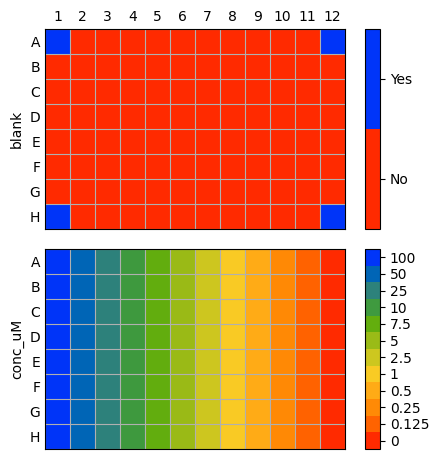

In [119]:
path_to_data = r"C:\Users\Modern\Documents\Biorad\CellProfiler\Results\2024-07-19 RD, Vero, hTERT CK-122\ExpWells_plate.csv"
path_to_wellmap = r"C:\Users\Modern\Documents\Biorad\CellProfiler\Results\2024-07-19 RD, Vero, hTERT CK-122\2024-07-19 RD CK-122 5H (Multichannel).toml"

data_raw = pd.read_csv(path_to_data) 

wellmap.show(path_to_wellmap)

print(data_raw.columns)
# print(data)


In [199]:
row_column_df = pd.DataFrame(columns=['row','col'])

row =  list(string.ascii_uppercase[0:8])
column = list(range(1,13))

row_column_list = []

for c in column:
    for r in row:
        array_i = [r,c]
        row_column_list.append(array_i)


# print(row_column_list)


row_column_df = pd.DataFrame(row_column_list, columns = ['row', 'col']) 

print(row_column_df)

   row  col
0    A    1
1    B    1
2    C    1
3    D    1
4    E    1
..  ..  ...
91   D   12
92   E   12
93   F   12
94   G   12
95   H   12

[96 rows x 2 columns]


In [209]:
data = data_raw[['Intensity_IntegratedIntensity_OrigGreen','Intensity_IntegratedIntensity_OrigRed','Intensity_MeanIntensity_OrigGreen','Intensity_MeanIntensity_OrigRed']].copy()
data_indexed = pd.concat([row_column_df, data], axis=1, join='inner')


data_indexed['col']=data_indexed['col'].astype(str)


In [225]:
labels = wellmap.load(path_to_wellmap)
# print(labels.dtypes)
# print(data_indexed.dtypes)


data_plate = pd.merge(data_indexed, labels)
# print(labels.dtypes)

data_plate[["conc_uM"]] = data_plate[["conc_uM"]].apply(pd.to_numeric)

print(data_plate)


   row col  Intensity_IntegratedIntensity_OrigGreen  \
0    A   1                                83.184317   
1    B   1                                99.647063   
2    C   1                               202.517655   
3    D   1                               105.866671   
4    E   1                               102.035298   
..  ..  ..                                      ...   
91   D  12                               987.415712   
92   E  12                               930.862773   
93   F  12                               956.392182   
94   G  12                               785.807872   
95   H  12                               108.756867   

    Intensity_IntegratedIntensity_OrigRed  Intensity_MeanIntensity_OrigGreen  \
0                             1079.223557                           0.013983   
1                             1129.788260                           0.016750   
2                             1162.647083                           0.034042   
3                  

Drop blank and outliers

In [227]:
data_plate_wo_blank = data_plate[data_plate.blank == 'No'].copy()

well_drop_list = ['G12']

# data_plate_wo_blank = data_plate_wo_blank[~data_plate_wo_blank['well'].isin(well_drop_list)]

# df_show = data_plate_wo_blank.loc[(data_plate_wo_blank['sample'] == 'Substance_1') & (data_plate_wo_blank['conc_uM'] == '0')]

df_show = data_plate_wo_blank.loc[(data_plate_wo_blank['conc_uM'] == 0)]

print(df_show[['Intensity_MeanIntensity_OrigGreen','well']])

    Intensity_MeanIntensity_OrigGreen well
89                           0.156651  B12
90                           0.149460  C12
91                           0.165980  D12
92                           0.156474  E12
93                           0.160765  F12
94                           0.132091  G12


Relative values calculation


In [230]:
blank_green = data_plate[(data_plate['blank'] == 'Yes')].loc[:,'Intensity_MeanIntensity_OrigGreen'].mean()

print(blank_green)

control_green = data_plate_wo_blank[(data_plate_wo_blank['conc_uM'] == 0)].loc[:,'Intensity_MeanIntensity_OrigGreen'].mean()

print(control_green)



data_plate_wo_blank['Green'] = data_plate_wo_blank['Intensity_MeanIntensity_OrigGreen'] - blank_green

data_plate_wo_blank['Green_relative'] = data_plate_wo_blank['Green']/control_green


df_show = data_plate_wo_blank.loc[(data_plate_wo_blank['conc_uM'] == 0)]

print(df_show[['Green_relative','well']])


0.01631927000826235
0.15357016578529387
    Green_relative well
89        0.913796  B12
90        0.866970  C12
91        0.974544  D12
92        0.912642  E12
93        0.940586  F12
94        0.753867  G12


Plotting


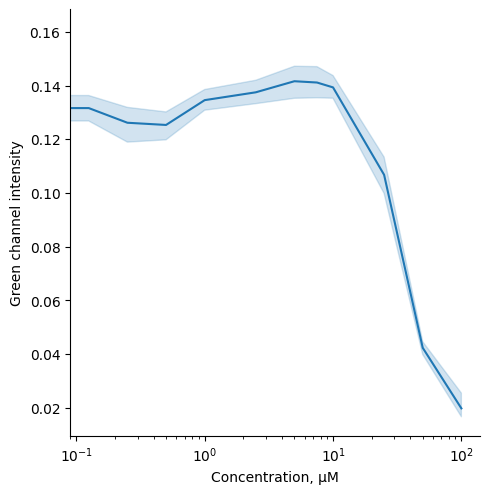

In [286]:
# sns.swarmplot(data=data_plate_wo_blank, x="conc_uM", y="Intensity_MeanIntensity_OrigGreen", hue='sample')
# ax = sns.scatterplot(data=data_plate_wo_blank, x="conc_uM", y="Intensity_MeanIntensity_OrigGreen")

ax = sns.relplot(data=data_plate_wo_blank, x="conc_uM", y="Intensity_MeanIntensity_OrigGreen", kind="line")

# ax.set(xlabel=None, ylabel='Viable cell, % of control')

ax.set(xlabel='Concentration, μM', ylabel='Green channel intensity')
ax.set(xscale="log")


# handles, labels = ax.get_legend_handles_labels()
# labels = ['CK-122','ISK-1','Control']
# ax.legend(handles=handles, labels=labels)